# Homework 3: 12707 and 12607
Homework created by Ryan Albelda


Note: sections that need editing are marked with ‘###’.

# Predicting Crop Yield: A Machine Learning Approach
 
Crop yield prediction is an important agricultural problem.

The crops included in the dataset are:

- Cassava                
- Maize                  
- Plantains and others   
- Potatoes                
- Rice, paddy             
- Sorghum                
- Soybeans               
- Sweet potatoes       
- Wheat                  
- Yams             


In the project, Machine Learning methods are applied to predict crop yield using publicly available data from FAO and World Data Bank. 

Homework is adapted from: Crop_yield_prediction_regression/crop_yield_prediction_ml.ipynb at master · ManikantaSanjay/crop_yield_prediction_regression. (n.d.). GitHub. Retrieved February 1, 2025, from https://github.com/ManikantaSanjay/crop_yield_prediction_regression/blob/master/crop_yield_prediction_ml.ipynb



Here hg/ha_yield is: hectograms per hectare. Hectogram (hg): A hectogram is a metric unit of mass that equals 100 grams (g). So, 1 hectogram = 100 grams

# Part One

### Objectives

1. **Better understand what a DataFrame looks like**  
   - Learn how tabular data is structured in Python using `pandas`  
   - Explore how rows and columns represent observations and variables

2. **Clean data to use in a machine learning model**  
   - Drop unnecessary columns and rename fields for clarity  
   - Identify and handle missing or inconsistent values  
   - Standardize formats for easier merging and analysis

3. **Visualize a correlation matrix as a heatmap**  
   - Compute pairwise correlation between numerical variables  
   - Use `seaborn` to create annotated heatmaps  
   - Interpret correlation strength and direction from visuals

4. **Create a transportation-related slide**  
   - Research how AI is used to reduce transportation emissions  
   - Summarize insights using data storytelling principles  
   - Develop clear recommendations and assess climate impact

5. **Practice data merging and integration**  
   - Join datasets using `pandas.merge()` with different strategies (inner, left, outer)  
   - Understand how data availability and missing values affect merge results

6. **Handle and interpolate missing data**  
   - Detect and quantify `NaN` values using `.isna()`  
   - Apply linear interpolation to fill in missing values  
   - Understand the role of `limit_direction='both'` in interpolation

7. **Enhance feature understanding through exploratory data analysis**  
   - Use `.describe()`, `.groupby()`, and `.nunique()` for data profiling  
   - Summarize key statistics and trends for each variable  
   - Identify outliers and patterns that may affect model performance

8. **Gain experience exporting and documenting cleaned datasets**  
   - Export final DataFrame to `.csv` for use in later ML modeling  
   - Write clear and informative column names  
   - Ensure reproducibility by keeping a record of processing steps


#### 1) Name, Andrew ID, Time to complete homework 
'###' 

# Part Two: Gathering & Cleaning Data


In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_yield = pd.read_csv('yield.csv')
### may need to change to obtain your file path 

In [3]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
# rename columns value to hg/ha_yield
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


#### 2) Here we are dropping the columns, "Year Code, Element Code, Element, Year Code, Area Code, Domain Code, Domain, Unit, Item Code". Why might you want to drop unwanted columns? 

'###'

*answer here*

In [6]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


####  3) What year does the data set start? What year does the data set end? 
'###'

*Answer here*


In [7]:
df_yield.info()
null_count = df_yield.isna().sum().sum()
print(f"Number of NaN values in DataFrame: {null_count}")

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
Number of NaN values in DataFrame: 0


#### 4) Do we have any null data in any the columns (Y/N)? Why might we worry about having null values? 
'###'

*answer here*

# Part Three 


### Climate Data : Rainfall 
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil are the environmental factors that influence plant growth and development.


Rainfall has a dramatic effect on agriculture. For this project rainfall per year information was gathered from World Data Bank. 

In [8]:
df_rain = pd.read_csv('rainfall.csv')
### may need to change to obtain your file path 
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [9]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

##### Ensuring column names are consistent across all dataframes is important for merging after cleaning

In [10]:
# check data types 
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


We can see from cell above that average_rain_fall_mm_per_year type is an object. 

#### 5) Comment below in the code what is going on in the code. Why do we need this line of code? 
'###' 

In [11]:
### Insert a comment to explain what is going here
#12607 --> SKIP 
df_rain['average_rain_fall_mm_per_year'] = df_rain['average_rain_fall_mm_per_year'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


Next, dropping any empty rows from dataset and merge yield dataframe with rain dataframe by year and area columns

In [12]:
df_rain = df_rain.dropna()

In [13]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


The rainfall dataframe begins at 1985 and ends at 2016. 

Merging data helps to combine two datasets. 

In [14]:
# merge yield dataframe with rain dataframe by year and area columns 
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'], how = 'inner')

#### 6) Here we are doing an inner merge. How would a left and outer merge be different? 

Hint: try running code like this: yield_df_right = pd.merge(df_yield, df_rain, on=['Year','Area'], how='right'),  and seeing how the data looks different, 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

'###'

*answer here*

left merge 


outer merge 

Now, we view the final shape of the dataframe and info of values:

In [15]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Maize,1986,16875,327.0
2,Afghanistan,Maize,1987,17020,327.0
3,Afghanistan,Maize,1989,16963,327.0
4,Afghanistan,Maize,1990,17582,327.0


In [16]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


#### 6) How did the start and end years change after we did our merge? Why might this be the case? 



'###'

*enter answer here*

# Part Four


### Pesticides Data:
Pesticide use for each item and country was also collected from FAO database.  

In [17]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [18]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [19]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [20]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [21]:
# merge Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'], how = 'inner')


In [22]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Maize,1991,29068,1485.0,121.0
2,Albania,Maize,1992,24876,1485.0,121.0
3,Albania,Maize,1993,24185,1485.0,121.0
4,Albania,Maize,1994,25848,1485.0,201.0


### Average Temperature: 

Average Temperature for each country was collected from World Bank Data. 

In [23]:
avg_temp=pd.read_csv('temp.csv')

In [24]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [25]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


The average temperature data starts in 1743 and ends in 2013, with some missing rows that need to be dropped

In [26]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

null_count = avg_temp.isna().sum().sum()
print(f"Number of NaN values in DataFrame: {null_count}")

Number of NaN values in DataFrame: 2547


### We have some missing values that need to be addressed.  We are going to use interpolation to obtain the missing values. 

In [27]:
avg_temp['avg_temp'] = avg_temp['avg_temp'].interpolate(method='linear', limit_direction='both')

Need to brush on your interpolation knowledge: here is a video that explains: https://www.khanacademy.org/computing/pixar/animate/parametric-curves/v/animation-5

#### 7) Define what limit_direction='both' means. Hint: Visit documentation for pd.interpolate.
'###'

*answer here*

In [28]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
## Here inner merge is the default 
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [29]:
yield_df.shape

(28242, 7)

In [30]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [31]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

#### 8) Do we have empty rows/empty data? If yes, or no, why is this the case? 




'###'

*answer here*


# Part Five: Data Exploration




**yield_df** is the final obtained dataframe; 

In [32]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [33]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


It can be noticed the high variance in the values for each columns, we will fix this by scaling. 

#### 9) Where else have you seen the use of scaling in this class? Classroom? Homework? Reading?  Why did we scale our variables in the past? 

'###'


*answer here*

In [34]:
#nunique counts the total number of unique values for the column 
yield_df['Area'].nunique()

101

#### 10) What does this 101 represent? Hint: It's not Hot Pockets, it's not the average temperature, look at the next lines of code to help you 

'###' 

*answer* 

In [35]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Area
India                 327420324
Brazil                167550306
Mexico                130788528
Japan                 124470912
Australia             109111062
Pakistan               73897434
Indonesia              69193506
United Kingdom         55419990
Turkey                 52263950
Spain                  46773540
South Africa           41333132
Germany                38780463
Egypt                  36828848
Canada                 34706922
Argentina              32864032
Italy                  32280700
Colombia               26927138
Dominican Republic     25312166
Morocco                22173010
Ecuador                21315591
Name: hg/ha_yield, dtype: int64

In [36]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(5)

Item      Area          
Cassava   India             142810624
Potatoes  India              92122514
          Brazil             49602168
          United Kingdom     46705145
          Australia          45670386
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes appear to be the dominant crop in the dataset, being the highest in four countries. 

The final dataframe starts from 1990 and ends in 2013. 

Now, exploring the relationships between the columns of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [37]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

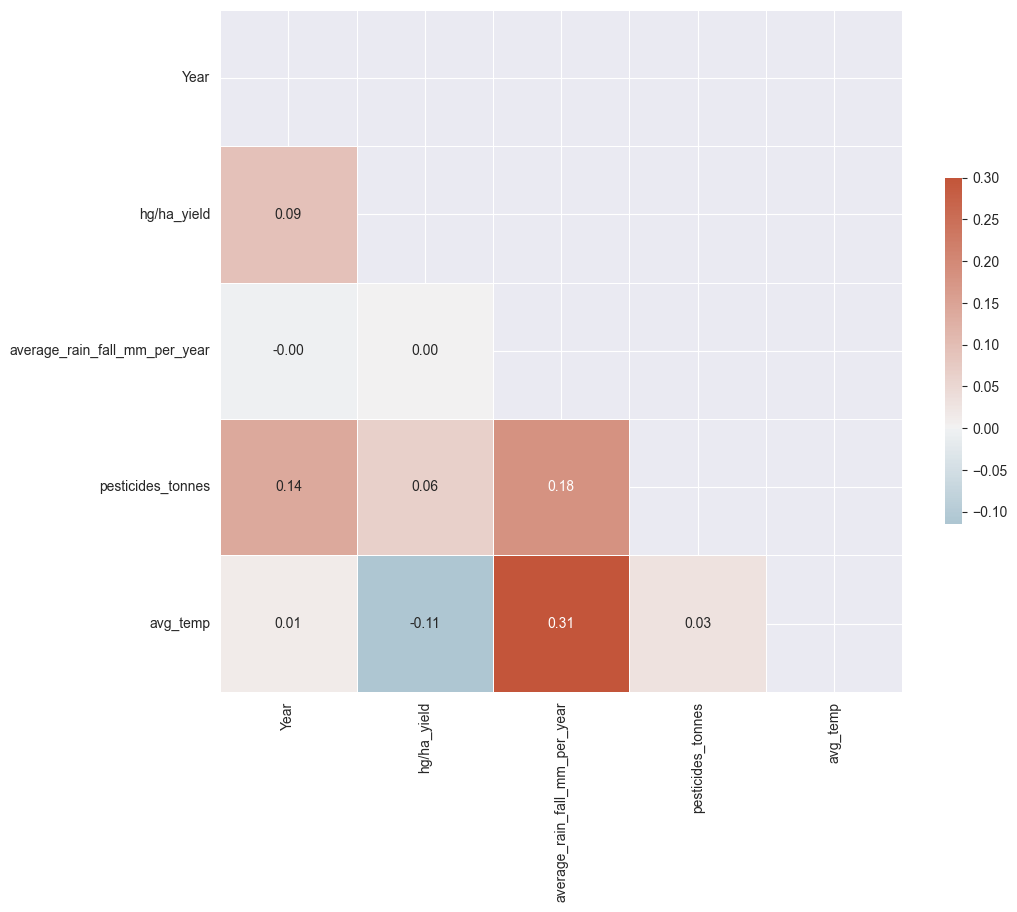

In [ ]:
# Compute correlation matrix
corr_data = yield_df.select_dtypes(include=[np.number]).corr()

# Create mask for upper triangle --> this hides the upper triangle 
mask = np.zeros_like(corr_data, dtype=bool)  
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)  

# Draw the heatmap with annotation
sns.heatmap(corr_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, fmt=".2f")  

plt.show()


#### 11) Is the following statement valid? Why or why not? "None of the other variables exhibit a strong or statistically significant correlation." 

Note, you may have to do a little bit of research on correlation heat map. 

Answer in 2-3 sentences. 

'###'

*answer here*

# Part Six: Export File


#### 12) Export File 
'###'

In [39]:
#write final df to csv file 
yield_df.###('yield_df.csv')

SyntaxError: invalid syntax (3084956182.py, line 2)

# Part 7: Create slide(s), upload to canvas 
10 points

Create 1-2 Powerpoint slides about a company that is working to use AI to help reduce transportation emissions. 

Upload is to be done via CANVAS. 

Rubric: 
- 2 pts: Use of Declarative Slide titlehttps://www.storytellingwithdata.com/blog/2020/3/5/transforming-slide-titles
- 2 pts: supporting image with a source of where it came from
- 4 pts: 3 bullet points in your own words describing the company or research that is using AI to reduce emissions or climate impacts in the transportation sector
- 2 points: Recommendation or your assessment on how much impact this could have (low, medium, or high) on the climate and why